ASBD LAB 1 - CED19I027 - N. SREE DHYUTI

In [55]:
# CED19I027 - N. SREE DHYUTI - ASBD LAB1

# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill

# Load Data
data = pd.read_excel(r"C:\Users\dhyut\SEM8\ASBD LAB\Lab 1\SampleGrader Data List.xlsx")
print(data)

   Unnamed: 0       Unnamed: 1  Total Marks
0   CSE20B001       AJAY KUMAR           20
1   CSE20B002      VIJAY KUMAR           30
2   CSE20B003          KARTHIK           40
3   CSE20B004        AISHWARYA           78
4   CSE20B005         ABISHEKH           70
5   CSE20B006  RAMESH KRISHNAN           65
6   CSE20B007          ANAND V           65
7   CSE20B008           OSWALD           88
8   CSE20B009       SOWBARNIKA           87
9   CSE20B010     VISHNU PRIYA           78
10  CSE20B011      SHIV VIDYUT           76
11  CSE20B012          SIRISHA           68
12  CSE20B013           NIKHIL           45
13  CSE20B014         SUDHEERA           69
14  CSE20B015   VIGNESH SAIRAJ           93
15  CSE20B016         RAMKUMAR           23
16  CSE20B017       RAVI KUMAR           45
17  CSE20B018   ILAM  BHARATHI           78
18  CSE20B019      SOWMYA JAIN           97
19  CSE20B020           BALAJI           78


Q1 Given the following setup {Class, Tally score, Frequency}, develop an application that generates
the table shown; (you can populate the relevant data; minimum data size :50 records). The table is only
an illustration for a data of color scores, you are free to test the application over any data set with the
application generating the tally and frequency scores.

In [26]:
# Q1 - Tally Table

# Generate data of random size > 50 with columns class, frequency, tally marks
size = random.randint(50, 1000)

random_dataset = []

for i in range(size):
    random_dataset.append(random.randint(1, 50))

frequency = [0]*50

for i in range(len(random_dataset)):
    frequency[random_dataset[i] - 1] += 1;


# Generate Tally string
tally_vals = []
def generate_tally(num):
    tally = ""
    
    full_tallys = num//5
    partial_tallys = num%5
    
    for i in range(full_tallys):
        tally += "||||\ "
        
    for i in range(partial_tallys):
        tally += "|"
    
    return tally

for i in range(50):
    string = generate_tally(frequency[i])
    tally_vals.append(string)
    

# Re-arrange data
data_frame = []
for i in range(50):
    class_ = i
    freq = frequency[i]
    tally_ = tally_vals[i]
    row_data = [class_, freq, tally_]
    data_frame.append(row_data)
    

table = pd.DataFrame(data_frame, columns=["Class", "Frequency", "Tally Marks"])
print(table)

# Save the generated Data
file_name = "Lab1Q1.xlsx"
table.to_excel(file_name)
print("Data exported to Excel names 'Lab1Q1.xlsx'")

    Class  Frequency Tally Marks
0       0          2          ||
1       1          4        ||||
2       2          4        ||||
3       3          5      ||||\ 
4       4          0            
5       5          1           |
6       6          6     ||||\ |
7       7          6     ||||\ |
8       8          3         |||
9       9          6     ||||\ |
10     10          3         |||
11     11          5      ||||\ 
12     12          4        ||||
13     13          2          ||
14     14          3         |||
15     15          4        ||||
16     16          6     ||||\ |
17     17          5      ||||\ 
18     18          3         |||
19     19          2          ||
20     20          5      ||||\ 
21     21          9  ||||\ ||||
22     22          5      ||||\ 
23     23          1           |
24     24          1           |
25     25          4        ||||
26     26          7    ||||\ ||
27     27          1           |
28     28          3         |||
29     29 

Q2 In a class of 18 students, assume marks distribution in an exam are as follows. Let the roll numbers
start with CSE20D01 and all the odd roll numbers secure marks as follows: 25+((i+7)%10) and even
roll numbers : 25+((i+8)%10). Develop an application that sets up the data and calculate the mean and
median for the marks obtained using the platform support.

In [27]:
# Q2 - mean median for 18 students

# Generate marks of 18 students as per question

roll_nums = []
roll_num_str = "CSE20D"

for i in range(18):
    if(i < 9):
        string = "0" + str(i+1)
    else:
        string = str(i+1)
    roll_num = roll_num_str + string
#     print(roll_num)
    roll_nums.append(roll_num)

marks = []

for i in range(18):
    #Odd
    if(i%2 == 0):
        score = 25 + ((i+7)%10)
    else:
        score = 25 + ((i+8)%10)
    marks.append(score)

# print(marks)

data_rolls = []

for i in range(18):
    roll = roll_nums[i]
    mark = marks[i]
    
    row = [roll, mark]
    data_rolls.append(row)
    
table = pd.DataFrame(data_rolls, columns=["Roll Number", "Marks"])


mean_data = statistics.mean(table["Marks"]) # Mean
median_data = statistics.median(table["Marks"]) # Median

print("Data:")
print(table)
print("Mean:")
print(mean_data)
print("Median:")
print(median_data)

Data:
   Roll Number  Marks
0     CSE20D01     32
1     CSE20D02     34
2     CSE20D03     34
3     CSE20D04     26
4     CSE20D05     26
5     CSE20D06     28
6     CSE20D07     28
7     CSE20D08     30
8     CSE20D09     30
9     CSE20D10     32
10    CSE20D11     32
11    CSE20D12     34
12    CSE20D13     34
13    CSE20D14     26
14    CSE20D15     26
15    CSE20D16     28
16    CSE20D17     28
17    CSE20D18     30
Mean:
29.88888888888889
Median:
30.0


Q3 For a sample space of 20 elements, the values are fitted to the line Y=2X+3, X>5. Develop an
application that sets up the data and computes the standard deviation of this sample space. (use random
number generator supported in your development platform to generate values of X).

In [49]:
# Q3 - generate Y and find SD

X = []

for i in range(20):
    X.append(random.randint(1,50))

Y = []

for i in range(20):
    Y.append((2*X[i]) + 3)
    
# SD of Y
SD_Y = statistics.stdev(Y)
print("X:")
print(X)
print("Y:")
print(Y)
print("Standard Deviation of Y is:")
print(SD_Y)

X:
[27, 31, 39, 10, 9, 41, 49, 40, 22, 19, 42, 44, 11, 1, 46, 48, 47, 4, 14, 20]
Y:
[57, 65, 81, 23, 21, 85, 101, 83, 47, 41, 87, 91, 25, 5, 95, 99, 97, 11, 31, 43]
Standard Deviation of Y is:
32.69379467920963


Q4 For a given data of heights of a class, the heights of 15 students are recorded as 167.65, 167, 172,
175, 165, 167, 168, 167, 167.3, 170, 167.5, 170, 167, 169, and 172. Develop an application that
computes; explore if there are any packages supported in your platform that depicts these measures /
their calculations of central tendency in a visual form for ease of understanding.

a. Mean height of the student

b. Median and Mode of the sample space

c. Standard deviation

d. Measure of skewness. 
[(Mean-Mode)/standard deviation]

Standard Deviation: 2.606617037647145
Skewness Coefficient: 0.6764834679838465


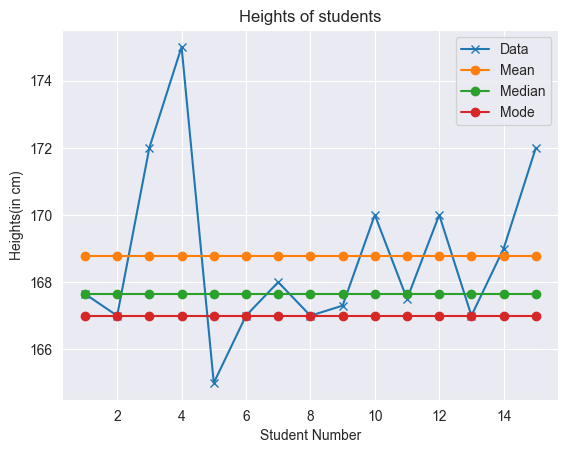

In [39]:
# Q4 - mean, median, mode, SD, Skewness

heights = [167.65, 167, 172, 175, 165, 167, 168, 167, 167.3, 170, 167.5, 170, 167, 169, 172]
students = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# mean, median, mode, Standard Deviation, Skewness
mean = statistics.mean(heights)
median = statistics.median(heights)
mode = statistics.mode(heights)
standard_deviation = statistics.stdev(heights)


sns.set_style("darkgrid")
plt.plot(students, heights, marker = "x")
plt.plot(students, [mean]*15, marker = "o")
plt.plot(students, [median]*15, marker = "o")
plt.plot(students, [mode]*15, marker = "o")
# plt.plot(students, [standard_deviation]*15, marker = "o")
plt.plot()
plt.xlabel("Student Number")
plt.ylabel("Heights(in cm)")
plt.title("Heights of students")
plt.legend(["Data", "Mean", "Median", "Mode"])

print(f"Standard Deviation: {standard_deviation}")
print(f"Skewness Coefficient: {((mean-mode)/standard_deviation)}")

Q5 In Analytics and Systems of Bigdata course, for a class of 100 students, around 31 students secured
‘S’ grade, 29 secured ‘B’ grade, 25 ‘C’ grades, and rest of them secured ‘D’ grades. If the range of each
grade is 15 marks. (S for 85 to 100 marks, A for 70 to 85 ...). Develop an application that represents
the above data: using Pie and Bar graphs.

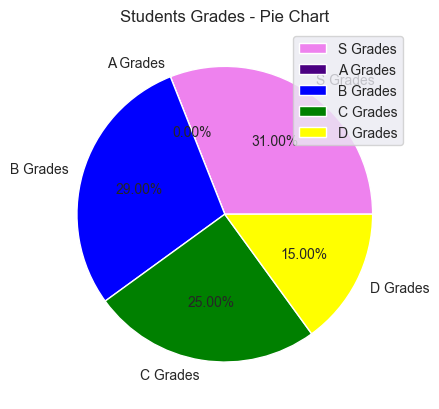

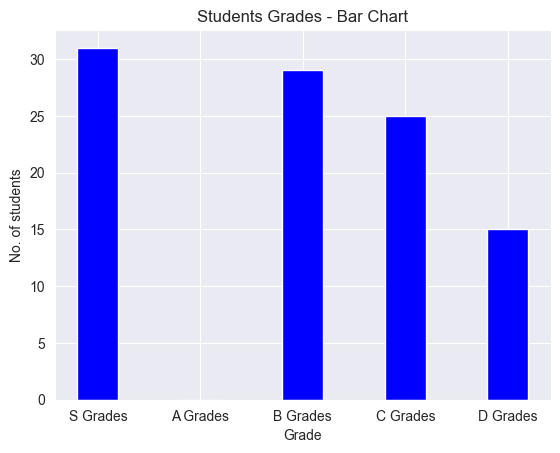

In [31]:
# Q5 - Pie and Bar Graphs

total = 100

S = 31
A = 0
B = 29
C = 25
D = total - (S + A + B + C)

y = []
tot_grades = [S, A, B, C, D]
for i in tot_grades:
    y.append(i/100)

Grade_ranges = []
temp = total

for i in range(5):
    grade_range = []
    grade_range.append(temp);
    temp -= 15
    grade_range.append(temp)
    Grade_ranges.append(grade_range)


mylabels = ["S Grades", "A Grades", "B Grades", "C Grades", "D Grades"]
mycolors = ["violet", "indigo", "blue", "green", "yellow"]

plt.pie(y, labels = mylabels, colors = mycolors,autopct='%1.2f%%')
plt.title("Students Grades - Pie Chart")
plt.legend()
plt.show() 

# creating the bar plot
plt.bar(mylabels,tot_grades, color ='blue',
        width = 0.4)
 
plt.xlabel("Grade")
plt.ylabel("No. of students")
plt.title("Students Grades - Bar Chart")
plt.show()

Q6 On a given day (average basis), a student is observed to spend 33% of time in studying, 30% in
sleeping, 18% in playing, 5% for hobby activities, and rest for spending with friends and family. Plot a
pie chart showing his daily activities.

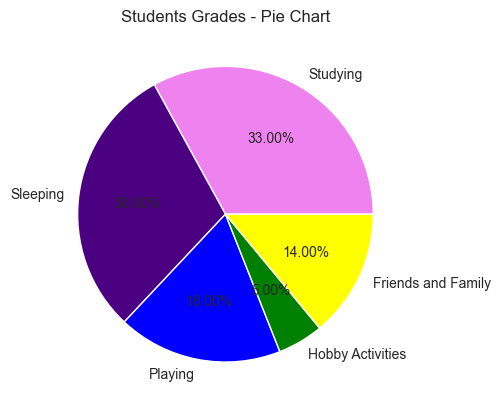

In [50]:
# Q6 - Pie Chart

study = 33
sleep = 30
play = 18
hobby = 5
frnds = 100 - (study + sleep + play + hobby)


activities = ["Studying", "Sleeping", "Playing", "Hobby Activities", "Friends and Family"]
mycolors = ["violet", "indigo", "blue", "green", "yellow"]

plt.pie([study, sleep, play, hobby, frnds], labels = activities, colors = mycolors,autopct='%1.2f%%')
plt.title("Students Grades - Pie Chart")
# plt.legend()
plt.show() 


Q7 Develop an application (absolute grader) that accepts marks scored by 20 students in ASBD course
(as a split up of three: Mid Sem (30), End Sem (50) and Assignments(20). Compute the total and use it
to grade the students following absolute grading: >=90 – S ; >=80 – A and so on till D. Compute the
Class average for total marks in the course and 50% of class average would be fixed as the cut off for
E. Generate a frequency table for the grades as well (Table displaying the grades and counts of them).

In [40]:
# Q7 - Absolute Grader

# Generate Data
num_of_students = random.randint(20,50)

midsem = []
endsem = []
assignment = []
scores = []
df = []

for i in range(num_of_students):
    mid = random.randint(0,30)
    end = random.randint(0,50)
    assign = random.randint(0, 20)
    tot = mid + end + assign    
    midsem.append(mid)
    endsem.append(end)
    assignment.append(assign)
    scores.append(tot)


class_avg = statistics.mean(scores)   
e_cutoff = class_avg/2

for i in range(num_of_students):
    grade = " "
    if(scores[i] >= 90):
        grade = "S"
    elif(scores[i] >= 80):
        grade = "A"
    elif(scores[i] >= 70):
        grade = "B"
    elif(scores[i] >= 60):
        grade = "C"
    elif(scores[i] >= 50):
        grade = "D"
    else:
        grade = "Fail"
        
    if((scores[i] >= e_cutoff) and (scores[i] < 50)):
        grade = "E"
        
    df.append([i+1, midsem[i], endsem[i], assignment[i], scores[i], grade])
    
print(f"Number of Students: {num_of_students}")
print("\nStudent Data:")
table = pd.DataFrame(df, columns=["Student No", "Midsem", "Endsem", "Assignment", "Total", "Grade"])
print(table)

print(f"\nClass Avgerage: {class_avg}")

print("\nFrequency Table for Grades:")
print(table["Grade"].value_counts())
# Save the generated Data
file_name = "Lab1Q7.xlsx"
table.to_excel(file_name)
print("\nData exported to Excel names 'Lab1Q7.xlsx'")

Number of Students: 43

Student Data:
    Student No  Midsem  Endsem  Assignment  Total Grade
0            1      25       2           4     31     E
1            2      29      29          11     69     C
2            3       3      10           1     14  Fail
3            4      13      36          14     63     C
4            5      22      29          11     62     C
5            6      18       9          19     46     E
6            7       8       8           4     20  Fail
7            8      27       8           8     43     E
8            9      27       4           2     33     E
9           10      27      25          17     69     C
10          11      29       2          11     42     E
11          12       2      32           4     38     E
12          13      30      31          19     80     A
13          14       9      22           4     35     E
14          15       5      31          18     54     D
15          16      12       9           3     24     E
16        

Q8 Extend the application developed in (7) to support relative grading which uses the class average
(mean) and standard deviation to compute the cutoffs for various grades as opposed to fixing them
statically; you can refer the sample grader (excel sheet) attached to understand the formulas for fixing
the cutoffs; the grader would involve, mean, standard deviation, max mark, passed students data mean,
etc. Understand the excel grader thoroughly before you try mimicking such an application in your
development platform.

In [41]:
# Q8 - Relative Grader
pass_minimum = statistics.mean(scores)/2

passing_students = []
max_marks = 100
df = []
for i in range(num_of_students):
    if(scores[i] >= pass_minimum):
        passing_students.append(scores[i])
        
pass_stud_mean = statistics.mean(passing_students)

x = pass_stud_mean - pass_minimum

s_cutoff = max_marks - (0.1*(max_marks - pass_stud_mean))
    
y = s_cutoff - pass_stud_mean

a_cutoff = pass_stud_mean + (y*5/8)
b_cutoff = pass_stud_mean + (y*2/8)
c_cutoff = pass_stud_mean - (x*2/8)
d_cutoff = pass_stud_mean - (x*5/8)
e_cutoff = pass_minimum

for i in range(num_of_students):
    grade = " "
    if(scores[i] >= s_cutoff):
        grade = "S"
    elif(scores[i] >= a_cutoff):
        grade = "A"
    elif(scores[i] >= b_cutoff):
        grade = "B"
    elif(scores[i] >= c_cutoff):
        grade = "C"
    elif(scores[i] >= d_cutoff):
        grade = "D"
    elif(scores[i] >= e_cutoff):
        grade = "E"
    else:
        grade = "Fail"
    df.append([i+1, scores[i], grade])


print(f"Number of Students: {num_of_students}")
print(f"Passing Cutoff/E-Cutoff: {pass_minimum}")
print(f"D-Cutoff: {d_cutoff}")
print(f"C-Cutoff: {c_cutoff}")
print(f"B-Cutoff: {b_cutoff}")
print(f"A-Cutoff: {a_cutoff}")
print(f"S-Cutoff: {s_cutoff}")
print("\nStudent Data:")
table = pd.DataFrame(df, columns=["Student No", "Score", "Grade"])
print(table)

class_avg = statistics.mean(scores)
print(f"\nClass Avgerage: {class_avg}")

print("\nFrequency Table for Grades:")
print(table["Grade"].value_counts())
# Save the generated Data
file_name = "Lab1Q8.xlsx"
table.to_excel(file_name)
print("\nData exported to Excel names 'Lab1Q8.xlsx'")

# Add Colors on failures and graders
wb = openpyxl.load_workbook("Lab1Q8.xlsx") #path to the Excel file
ws = wb['Sheet1'] #Name of the working sheet
fill_cell_red = PatternFill(patternType='solid', fgColor='C64747')
fill_cell_yellow = PatternFill(patternType='solid', fgColor='FCBA03')
fill_cell_green = PatternFill(patternType='solid', fgColor='35FC03')
cnt = 1
for cell in ws.iter_rows():
    #d2
    string = 'D'
    string += str(int(cnt))
    cnt += 1
    if(str(cell[3].value) == "Fail"):
        ws[string].fill = fill_cell_red
    elif(str(cell[3].value) == "S"):
        ws[string].fill = fill_cell_yellow
    else:
        ws[string].fill = fill_cell_green
        
wb.save(file_name)

Number of Students: 43
Passing Cutoff/E-Cutoff: 23.790697674418606
D-Cutoff: 33.86918604651163
C-Cutoff: 43.94767441860465
B-Cutoff: 61.766666666666666
A-Cutoff: 78.41666666666666
S-Cutoff: 95.06666666666666

Student Data:
    Student No  Score Grade
0            1     31     E
1            2     69     B
2            3     14  Fail
3            4     63     B
4            5     62     B
5            6     46     C
6            7     20  Fail
7            8     43     D
8            9     33     E
9           10     69     B
10          11     42     D
11          12     38     D
12          13     80     A
13          14     35     D
14          15     54     C
15          16     24     E
16          17     52     C
17          18     52     C
18          19     18  Fail
19          20     71     B
20          21     31     E
21          22     67     B
22          23     49     C
23          24     75     B
24          25     28     E
25          26     35     D
26          27     42

Q9 Consider the following sample of weights for 45 individuals: 79 71 89 57 76 64 82 82 67 80 81 65
73 79 79 60 58 83 74 68 78 80 78 81 76 65 70 76 58 82 59 73 72 79 87 63 74 90 69 70 83 76 61 66 71
60 57 81 57 65 81 78 77 81 81 63 71 66 56 62 75 64 74 74 70 71 56 69 63 72 81 54 72 91 92. For the
above data generates histograms and depict them using packages in your platform. Explore the different
types of histograms available and test drive the types supported in your platform

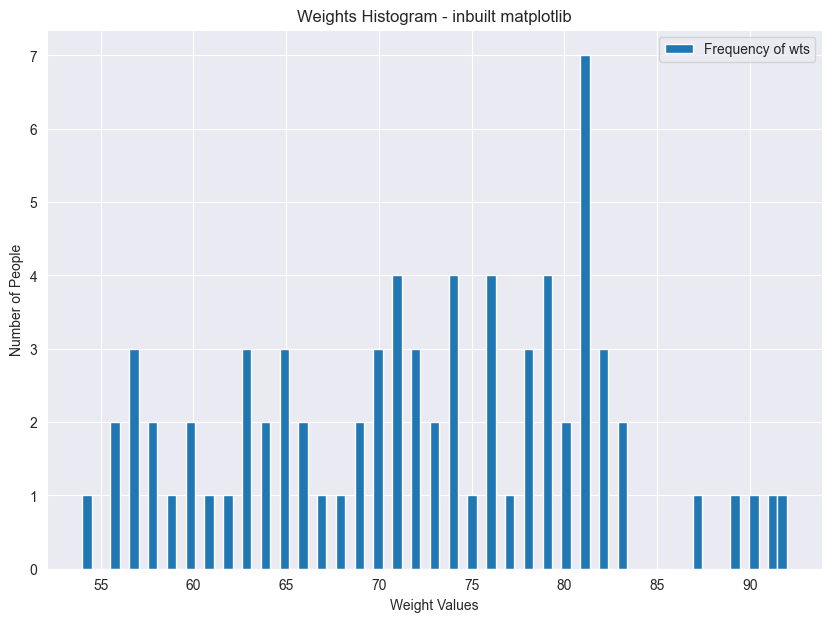

In [51]:
# Q9 - Histograms
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

weights = [79, 71, 89, 57, 76, 64, 82, 82, 67, 80, 
           81, 65, 73, 79, 79, 60, 58, 83, 74, 68, 
           78, 80, 78, 81, 76, 65, 70, 76, 58, 82, 
           59, 73, 72, 79, 87, 63, 74, 90, 69, 70, 
           83, 76, 61, 66, 71, 60, 57, 81, 57, 65, 
           81, 78, 77, 81, 81, 63, 71, 66, 56, 62,
           75, 64, 74, 74, 70, 71, 56, 69, 63, 72, 
           81, 54, 72, 91, 92]


# Hisogram 1 - Using Matplotlib inbuilt
wts = np.array(weights)
n_bins = 75
legend = ['Frequency of wts']

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(wts, bins=n_bins)

 # Adding extra features   
plt.xlabel("Weight Values")
plt.ylabel("Number of People")
plt.legend(legend)
plt.title('Weights Histogram - inbuilt matplotlib')
 
# Show plot
plt.show()

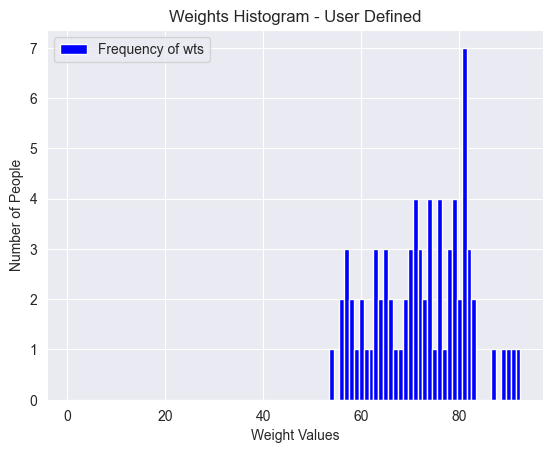

In [52]:
# Histogram 2 - User Defined

min_wt = min(weights)
max_wt = max(weights)

freq = [0]*(max_wt)
wt_val = []

for i in range(max_wt):
    wt_val.append(i+1)
for i in range(len(weights)):
    freq[weights[i]-1] += 1


wts = np.array(weights)
n_bins = 75
legend = ['Frequency of wts']

# Creating histogram
plt.bar(wt_val,freq, color ='blue',
        width = 1)

 # Adding extra features   
plt.xlabel("Weight Values")
plt.ylabel("Number of People")
plt.legend(legend)
plt.title('Weights Histogram - User Defined')
 
# Show plot
plt.show()

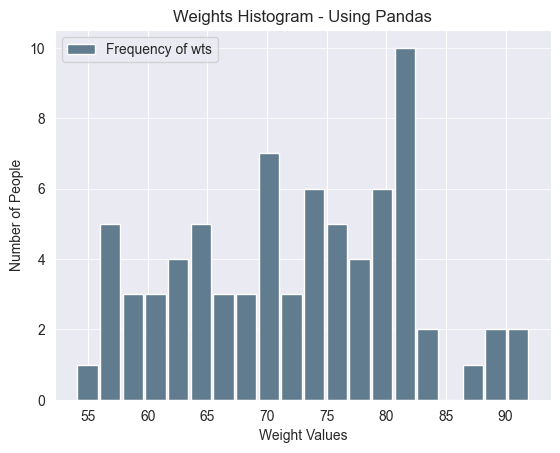

In [53]:
# Histogram 3 - using Pandas

size, scale = 1000, 10
commutes = pd.Series(wts)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Weights Histogram - Using Pandas')
plt.xlabel("Weight Values")
plt.ylabel("Number of People")
plt.legend(legend)
plt.grid(axis='y', alpha=0.75)

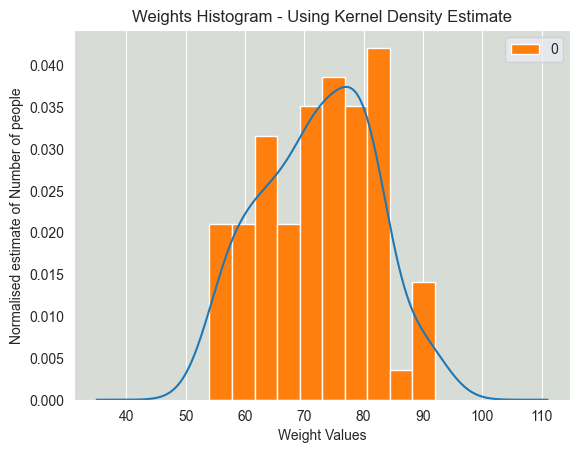

In [54]:
# Histogram 4 - using Kernel Desnity Estimate

means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(wts)
# dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Weights Histogram - Using Kernel Density Estimate')
dist.plot.hist(density = True, ax=ax)
ax.set_ylabel('Normalised estimate of Number of people')
ax.set_xlabel('Weight Values')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')